# Diagnoise Covid 19 pneumonia Chest x-ray 
By Omar salah 

[Dataset that was used  (chest-xray-covid19-pneumonia )](https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia)

[DenseNet Weights was used](https://www.kaggle.com/xhlulu/densenet-keras)

[DenseNet Paper](https://towardsdatascience.com/paper-review-densenet-densely-connected-convolutional-networks-acf9065dfefb)

[Code on Kaggle](https://www.kaggle.com/omarsalahhemied/diagnoise-covid-19-chest-x-ray-with-acc-approx-96/edit)

*Import Libraries*

In [ ]:

import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical

In [ ]:
#read DataSet
TrianImage="/kaggle/input/chest-xray-covid19-pneumonia/Data/train/"
TestImage="/kaggle/input/chest-xray-covid19-pneumonia/Data/test/"


print(TrianImage)
print(TestImage)

/kaggle/input/chest-xray-covid19-pneumonia/Data/train/
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/


In [ ]:
#to get all image names in train file
Pneumonaimages = os.listdir(TrianImage + "/PNEUMONIA")
Normalimages = os.listdir(TrianImage + "/NORMAL")
COVID19images = os.listdir(TrianImage + "/COVID19")




    




# # **Explore the Data**

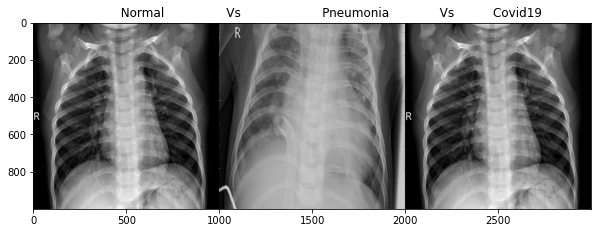

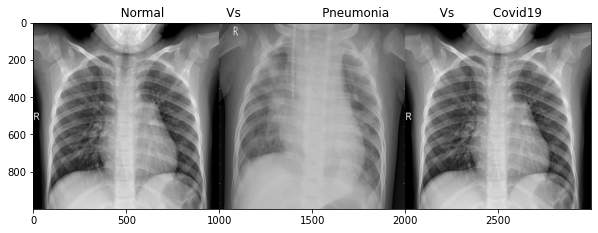

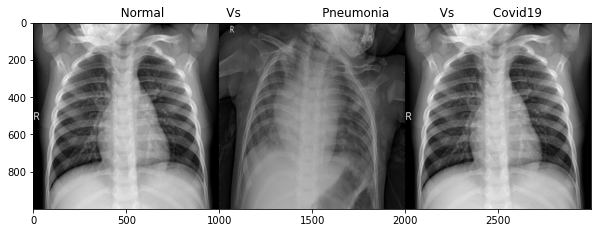

In [ ]:
import matplotlib.pyplot as plt
def plotter(i):
    imagePneumona1 = plt.imread(os.path.join(TrianImage+r"/PNEUMONIA",Pneumonaimages[i]))
    imagePneumona1=cv2.resize(imagePneumona1,(1000,1000))#resize to make the tow images as same size
    
    imageNormal1 = plt.imread(os.path.join(TrianImage+r"/NORMAL",Normalimages[i]))
    imageNormal1=cv2.resize(imageNormal1,(1000,1000))
    
    imageCovid191 = plt.imread(os.path.join(TrianImage+r"/COVID19",COVID19images[i]))
    imageCovid191=cv2.resize(imageNormal1,(1000,1000))
    
    plt.figure(figsize=(10,20))
    plt.imshow(    np.concatenate((imageNormal1, imagePneumona1,imageCovid191), axis=1),cmap="gray")
    plt.title("          Normal                Vs                     Pneumonia             Vs          Covid19")
 
    
    plt.show()
for i in range(0,3):
    plotter(i)

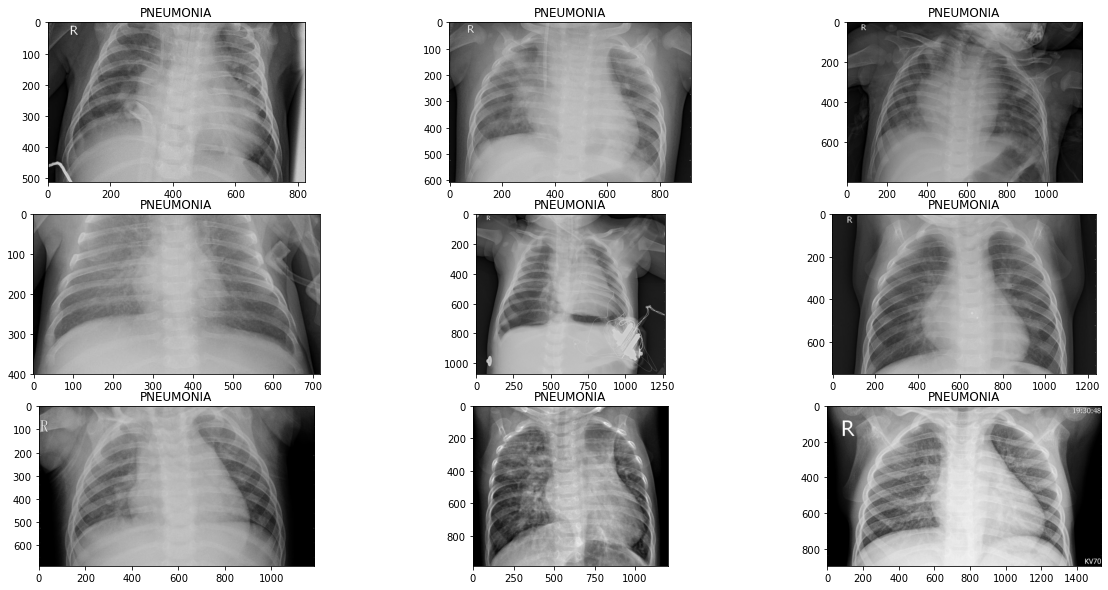

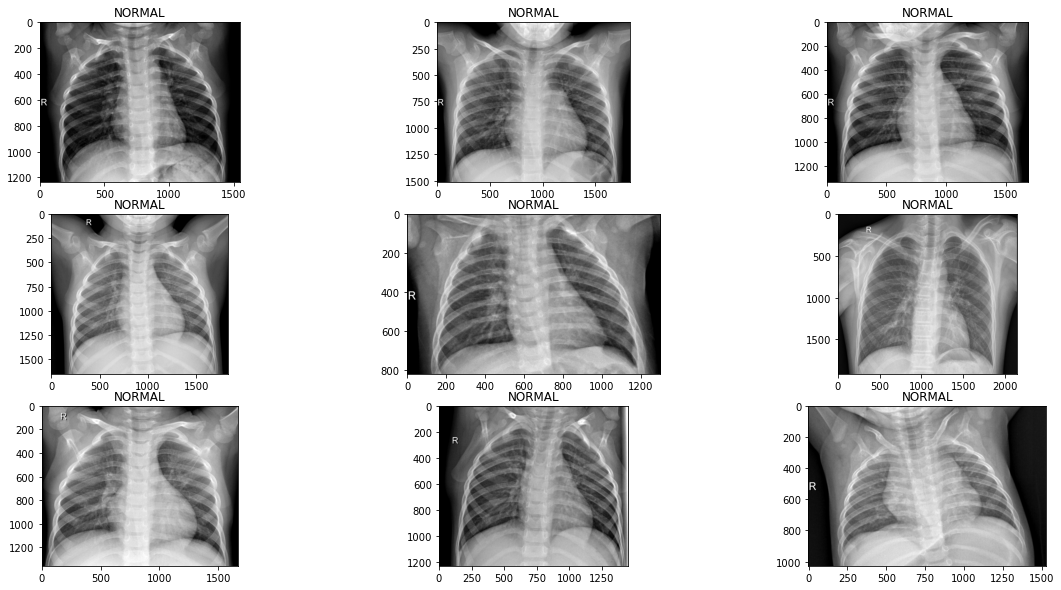

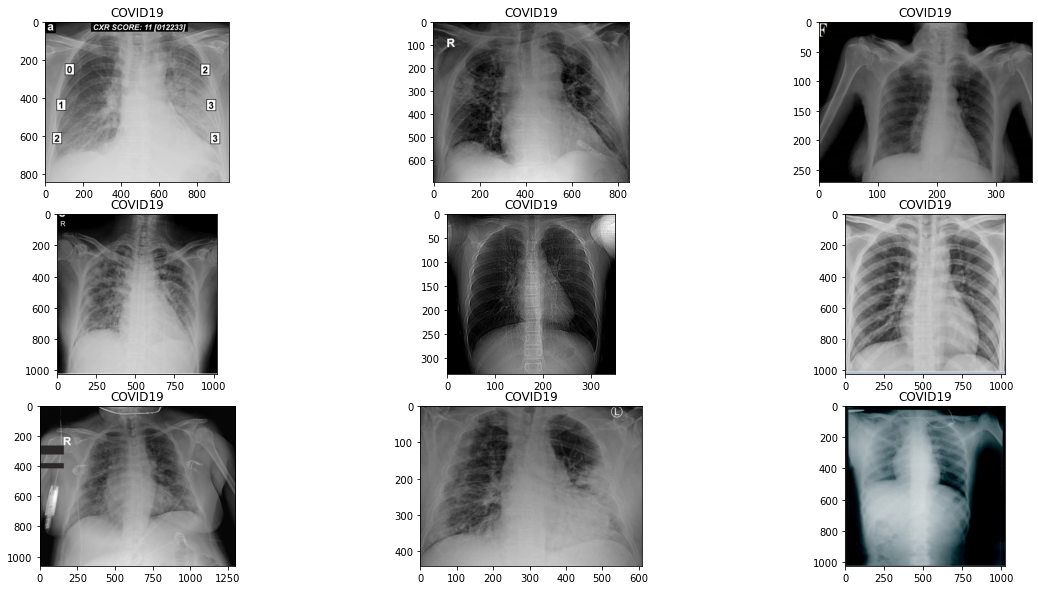

In [ ]:
#plot to show the size of some image
#plot PNEUMONIA
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/PNEUMONIA",Pneumonaimages[i])),cmap='gray')
    plt.title("PNEUMONIA")
    
plt.show()
#plot NORMAL
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/NORMAL",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")

plt.show()
#plot 
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/COVID19",COVID19images[i])),cmap='gray')
    plt.title("COVID19")

In [ ]:

#Class Names
Labels={'NORMAL':0,'PNEUMONIA':1,'COVID19':2}



# convert label to code
def getCode(label):
    return Labels[label]


# convert label to code
def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x
        
        
        
#Test        
print(getCode('COVID19'))
print(getLabel(1))

2
PNEUMONIA


In [ ]:
#Reading image data
import glob as gb
import cv2  
sizeImage=500 # to resize the all image as same size

#to read all images from directory
def getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in  os.listdir(Dir) : #to get the file name 
        files = gb.glob(pathname= str( Dir  +"/" +folder+ '//*.jpg' )) # to get the images
        for file in files:
                picture=cv2.imread(file) #  or plt.imread(file)
                imageArray=cv2.resize(picture,(sizeImage,sizeImage))
                X.append(list(imageArray))
                y.append(getCode(folder))
    X=np.array(X)
    y=np.array(y)
    return X,y




In [ ]:
#get train data
X_train, y_train = getData(TrianImage,sizeImage)
# get test data
X_test , y_test = getData(TestImage,sizeImage)



In [ ]:
#get Data to Validation 
X_validation=X_test[:8]
y_validation=y_test[:8]

#print
print(X_validation.shape)
print(y_validation.shape)

X_test=X_test[8:]
y_test=y_test[8:]


(8, 500, 500, 3)
(8,)


In [ ]:
#Data Shape
print("X_train Shape        ",X_train.shape)
print("X_test Shape         ",X_test.shape)
print("X_validation Shape   ",X_validation.shape)


X_train Shape         (5144, 500, 500, 3)
X_test Shape          (1280, 500, 500, 3)
X_validation Shape    (8, 500, 500, 3)


In [ ]:
#Convert y_train to categorical
y_train=to_categorical(y_train,3)
print("y_train ",y_train.shape)

#Convert y_validation to categorical
y_validation=to_categorical(y_validation,3)
print("y_validation ",y_train.shape)


#Convert y_train to categorical
y_test=to_categorical(y_test,3)
print("y_test ",y_test.shape)


y_train  (5144, 3)
y_validation  (5144, 3)
y_test  (1280, 3)


In [ ]:
#load weight
Network_Weight="/kaggle/input/densenet-keras/DenseNet-BC-169-32-no-top.h5"
print(Network_Weight)

/kaggle/input/densenet-keras/DenseNet-BC-169-32-no-top.h5


#Transfer Learning Using DenseNet

In [ ]:
 
from tensorflow.keras.applications.densenet import DenseNet169
pre_trained_model = DenseNet169(input_shape = (sizeImage, sizeImage, 3), 
                                include_top = False, 
                                weights = None)
pre_trained_model.load_weights(Network_Weight)
for layer in pre_trained_model.layers:
    layer.trainable = False  #to make the layers to Freeze Weights
pre_trained_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 506, 506, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 250, 250, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 250, 250, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
from tensorflow.keras import Model


x = tf.keras.layers.Flatten()(pre_trained_model.output)

#Full Connected Layers
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.4)(x)

x=tf.keras.layers.Dense(3, activation='sigmoid')(x)
       
#Model
model = Model( pre_trained_model.input, x) 

print(model.summary())
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 506, 506, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 250, 250, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 250, 250, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

conv5_block27_0_bn (BatchNormal (None, 15, 15, 1472) 5888        conv5_block26_concat[0][0]       
__________________________________________________________________________________________________
conv5_block27_0_relu (Activatio (None, 15, 15, 1472) 0           conv5_block27_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block27_1_conv (Conv2D)   (None, 15, 15, 128)  188416      conv5_block27_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block27_1_bn (BatchNormal (None, 15, 15, 128)  512         conv5_block27_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block27_1_relu (Activatio (None, 15, 15, 128)  0           conv5_block27_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_bloc

In [ ]:
#Reduce Learning Rate
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## Fit Model


In [ ]:

batch_size=256
epochs = 40
history = model.fit(X_train, y_train,validation_data =(X_validation,y_validation) ,batch_size=batch_size,callbacks=[lr_reduce,checkpoint] ,
         epochs=epochs)


Epoch 1/40
21/21 [==============================] - 44s 2s/step - loss: 13.7016 - accuracy: 0.7504 - val_loss: 3.5372 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/40
21/21 [==============================] - 39s 2s/step - loss: 1.1115 - accuracy: 0.8915 - val_loss: 0.1736 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/40
21/21 [==============================] - 39s 2s/step - loss: 0.3477 - accuracy: 0.8845 - val_loss: 0.1931 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/40
21/21 [==============================] - 39s 2s/step - loss: 0.3060 - accuracy: 0.8777 - val_loss: 0.1983 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/40
21/21 [==============================] - 39s 2s/step - loss: 0.2938 - accuracy: 0.8962 - val_loss: 0.5764 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/40
21/21 [==============================] - 39s 2s/step - loss: 0.2498 - accuracy: 0.8900 - val_loss: 0.1762 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/40
21/21 [==============================] - 39s 2s/step - loss: 0.2243 - 

##Results

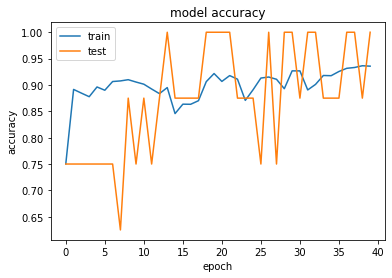

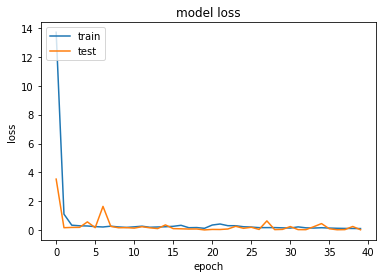

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluate Model
model.evaluate(X_test,y_test)

40/40 [==============================] - 10s 261ms/step - loss: 0.1536 - accuracy: 0.9586


[0.15359382331371307, 0.9585937261581421]

In [ ]:
#prediction
pred=model.predict(X_test)

In [ ]:
#Calculate the prediction 
y_true=[]

for i in range(len(y_test)):
    y_true.append( np.argmax(y_test[i]))
y_true=np.array(y_true)

print(y_true)


COVID19
[2 2 2 ... 1 1 1]
[2 2 2 ... 1 1 1]


In [ ]:

from sklearn.metrics import confusion_matrix
pred= np.argmax(pred,axis=1)

cm=confusion_matrix(pred,y_true)
cm

array([[294,  26,   0],
       [ 20, 827,   2],
       [  3,   2, 106]])

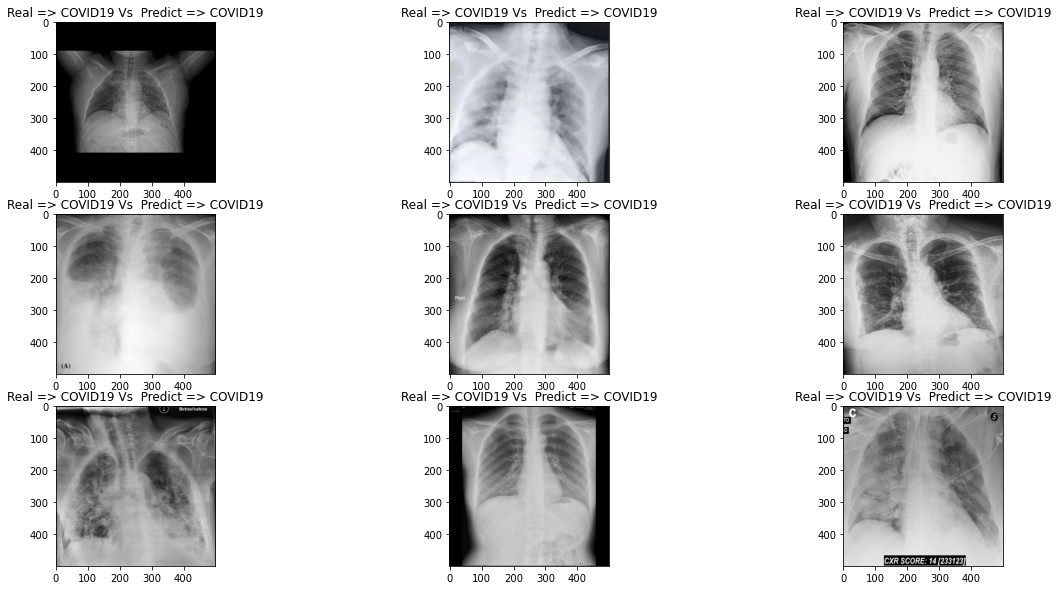

In [ ]:
plt.figure(figsize=(20,10))
for i in range(9):
    
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(X_test[i],cmap='gray')
    plt.title(f"   Real: {getLabel(y_true[i])   } Vs  Predict: {getLabel(pred[i])}")

In [ ]:

getLabel(pred[1]) 

'COVID19'

In [ ]:


#to save model to use later without another training 
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("modelCovid19(95.86%).json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelCovid19(95.86%).h5")
print("Saved model to disk")
# later...


Saved model to disk


In [ ]:

#to save model to use later without another training 

model.save('modelCovid19(95.86%)')

In [ ]:
 
# load json and create model
json_file = open('modelCovid19(95.86%).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelCovid19(95.86%).h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
loaded_model.evaluate(X_test,y_test)

40/40 [==============================] - 10s 261ms/step - loss: 0.1536 - accuracy: 0.9586


[0.15359382331371307, 0.9585937261581421]